In [5]:
#Visualize Samples from the model
import sys, os, glob
from collections import OrderedDict
sys.path.append('../../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=5
mpl.rcParams['lines.markersize']=15
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 40
mpl.rcParams['axes.labelsize']=40
mpl.rcParams['legend.fontsize']=40
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, getUniqueIDFromParams
from optvaeutils.viz import getName
subdirectories = ['none_finopt','finopt_none']

#DIR = '../../expt/results_dec19/chkpt-rcv2_miao-';MAXEPOCH='200'
DIR = '../../expt/chkpt-wikicorp-';MAXEPOCH='21'

short_names = {}
if os.path.exists('../../optvaeutils/default-hmap.pkl'):
    short_names = readPickle('../../optvaeutils/default-hmap.pkl')[0]
colors = {}
colors[0] = 'r'
colors[1] = 'b'
colors[2] = 'g'
colors[3] = 'k'
colors[4] = 'y'
colors[5] = 'k'
colors[6] = 'm'
colors[7] = 'c'
colors[8] = 'b'

markers = {}
markers[0]= '*'
markers[1]= '<'
markers[2]= '>'
markers[3]= '8'
markers[4]= 'p'
markers[5]= 'v'
markers[6]= '3'
markers[7]= '2'
markers[8]= '4'

#Evalaute POB 
from datasets.load import loadDataset
from optvaedatasets.load import loadDataset as loadDataset_OVAE
dataset        = DIR.split('chkpt-')[1][:-1]
print 'Dataset:', dataset
dset = loadDataset_OVAE(dataset)
NLL_train_prob, NLL_valid_prob = np.nan,np.nan

Dataset: wikicorp
Read  3  objects


In [6]:
#Visualize Training Curves (train/valid/test) across different 
datalist, l_params, namelist = [],[],[]
ctr = 0

results = {}
for sdir in subdirectories:
    print sdir,DIR+sdir+'/*EP'+MAXEPOCH+'*.h5'
    for f in glob.glob(DIR+sdir+'/*EP'+MAXEPOCH+'*.h5'):
        print f,
        if 'normalize' in f:
            continue
        params = readPickle(getConfigFile(f))[0]
        params['replicate_K'] = None
        name   = getName(params)
        data   = loadHDF5(f)
        l_params.append(params)
        datalist.append(data)
        namelist.append(name)
        if 'valid_bound_0' in data:
            min_0 = np.min(data['valid_bound_0'][:,1])
            min_f = np.min(data['valid_bound_f'][:,1])
            amin  = np.argmin(data['valid_bound_f'][:,1])
            epmin = data['valid_bound_f'][amin,0]
        elif 'valid_perp_0' in data:
            min_0 = np.min(data['valid_perp_0'][:,1])
            min_f = np.min(data['valid_perp_f'][:,1])
            amin  = np.argmin(data['valid_perp_f'][:,1])
            epmin = data['valid_perp_f'][amin,0]
        else:
            print data.keys()
            min_0 = np.min(data['valid_perp_bound_0'][:,1])
            min_f = np.min(data['valid_perp_bound_f'][:,1])
            amin  = np.argmin(data['valid_perp_bound_f'][:,1])
            epmin = data['valid_perp_bound_f'][amin,0]
        print ctr,name,min_0,min_f
        ctr+=1
p_names = getUniqueIDFromParams(l_params, short_names = short_names)
names   = []
for a,b in zip(namelist,p_names):
    names.append(a+b)
idxlist = []
print '\n'
#Restriction
for idx,name in enumerate(names):
    print idx,name
    idxlist.append(idx)
datalist = [datalist[k] for k in idxlist]
def update_name(name):
    if 'none_finopt' in name:
        return 'M1-M100'
    else:
        return 'M100-M1'
    ar   = str(name.split('anneal_rate-')[1])
    pl   = str(int(name.split('p_layers-')[1].split('-anneal')[0])+1)
    if 'baseline' in name:
        return pl+'-M1'+'-'+str(int(float(ar)/1000))+'k'
    else:
        return pl+'-M'+name.split('fin')[1].split('-')[0]+'-'+ar+'k'

names = [update_name(names[k]) for k in idxlist]

for idx,name in enumerate(names):
    results[name] = datalist[idx]

print '\n Restricted Plots to: ',names

none_finopt ../../expt/chkpt-wikicorp-none_finopt/*EP21*.h5
../../expt/chkpt-wikicorp-none_finopt/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-22-plr-1_0e-02-ar-0-otype-none_finopt-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP21-stats.h5 Read  1  objects
0 none-fin100 1437.46599845 1247.91962285
finopt_none ../../expt/chkpt-wikicorp-finopt_none/*EP21*.h5
../../expt/chkpt-wikicorp-finopt_none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-22-plr-1_0e-02-ar-0-otype-finopt_none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP21-stats.h5 Read  1  objects
1 fin-none100 1327.61929992 1207.44294546


0 none-fin100-opt_type-none_finopt
1 fin-none100-opt_type-finopt_none

 Restricted Plots to:  ['M1-M100', 'M100-M1']


[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
M1-M100 1247.91962285 7
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
M100-M1 1207.44294546 7
valid-mixed-wikicorp.pdf saved


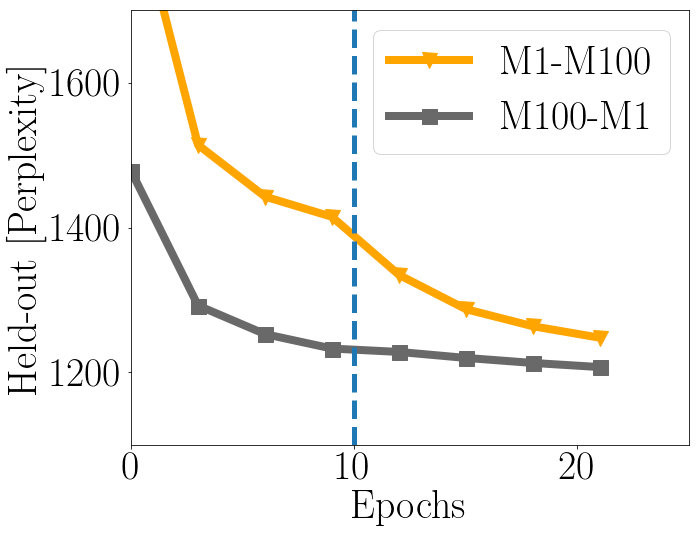

In [24]:
#Visualize Training Curves (train/valid/test)
NS = 'M100'
if 'wikicorp' in dataset:
    NS = 'M100'

colorFinal = OrderedDict()
#colorFinal['1-M1-anneal-0']    =  'r'
colorFinal['M1-M100']=  'orange'
colorFinal['M100-M1']=  'dimgrey'
markerFinal = OrderedDict()
#markerFinal['1-M1-anneal0']      =  'o'
markerFinal['M1-M100']  =  'v'
markerFinal['M100-M1']  =  's'

fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for name in markerFinal:#['1-M1','1-'+NS,'3-M1','3-'+NS]:
    if name not in results:
        print 'Skipping',name
        continue
    data = results[name]
    print data.keys()
    if 'valid_perp_bound_0' in data:
        valid_bound_0 = data['valid_perp_bound_0']
        valid_bound_f = data['valid_perp_bound_f']
    elif 'valid_perp_0' in data:
        valid_bound_0 = data['valid_perp_0']
        valid_bound_f = data['valid_perp_f']
    else:
        valid_bound_0 = data['valid_bound_0']
        valid_bound_f = data['valid_bound_f']
    print name,np.min(valid_bound_f[:,1]),np.argmin(valid_bound_f[:,1])
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
        
    #ax.plot(valid_bound_0[:,0],valid_bound_0[:,1],'--',color=COLOR,marker = MARKER)
    ax.plot(valid_bound_f[:,0],valid_bound_f[:,1],lw=8,marker = MARKER,color=COLOR,label=name)

ax.axvline(x=10,linestyle='--')
ax.set_ylabel('Held-out [Perplexity]')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'rcv2' in dataset:
    ax.set_xlim([0,200])
    ax.set_ylim([300,600])
    ax.legend(loc='upper center', bbox_to_anchor=(.58, 1.),ncol=2,columnspacing=0.1,fontsize=40)
if 'wikicorp' in dataset:
    ax.set_ylim([1100,1700])
    ax.set_xlim([0,25])
    ax.legend(loc='upper center', bbox_to_anchor=(.7, 1.),ncol=1,columnspacing=0.1,fontsize=40)
    ax.set_xticks(np.arange(0,int(MAXEPOCH)+1,10))
    
fname = 'valid-mixed-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

M1-M100
M100-M1
train-mixed-wikicorp.pdf saved


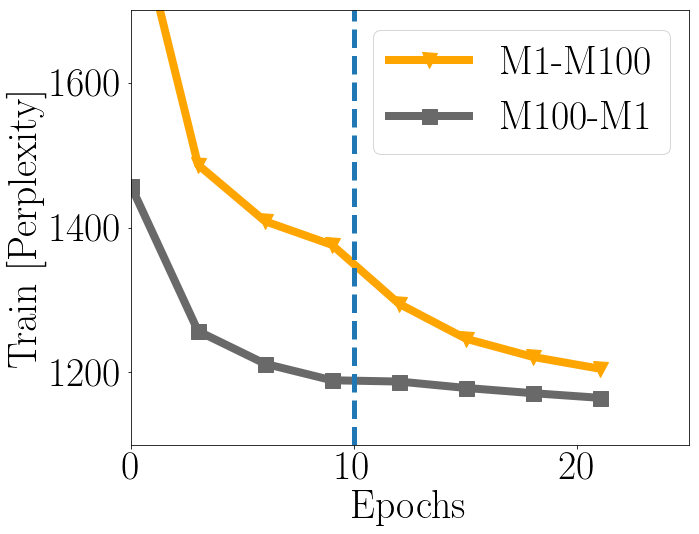

In [23]:
#Visualize Training Curves (train/valid/test)
fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for name in markerFinal:
    if name not in results:
        print 'Skipping',name
        continue
    data = results[name]
    train_bound_0 = data['train_perp_0']
    train_bound_f = data['train_perp_f']
    print name
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    validXY=data['valid_perp_f']
    if 'rcv2' in dataset:
        X  = train_bound_0[:,0][::20]
        Y  = train_bound_0[:,1][::20]
    else:
        X  = train_bound_0[:,0][::5]
        Y  = train_bound_0[:,1][::5]
    #ax.plot(X,Y,'--',color=COLOR,marker = MARKER)
    if 'rcv2' in dataset:
        X  = train_bound_f[:,0][::20]
        Y  = train_bound_f[:,1][::20]
    else:
        X  = train_bound_f[:,0]#[::5]
        Y  = train_bound_f[:,1]#[::5]
    #if 'wikicorp' not in dataset:
    idx = np.where(np.invert(np.isnan(Y)))[0]
    X = X[idx]
    Y = Y[idx]
    if len(idx)>10:
        X = X[::3]
        Y = Y[::3]
    ax.plot(X,Y,lw=8,marker = MARKER,color=COLOR,label=name)

ax.set_ylabel('Train [Perplexity]')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'rcv2_miao' in dataset:
    pass
    #ax.set_xlim([0,200])
    #ax.set_ylim([300,600])
if 'wikicorp' in dataset:
    ax.set_ylim([1100,1700])
    ax.set_xlim([0,25])
    ax.legend(loc='upper center', bbox_to_anchor=(.7, 1.),ncol=1,columnspacing=0.1,fontsize=40)
    ax.set_xticks(np.arange(0,int(MAXEPOCH)+1,10))

ax.axvline(x=10,linestyle='--')
fname = 'train-mixed-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

singular-epochs-mixed-wikicorp.pdf saved


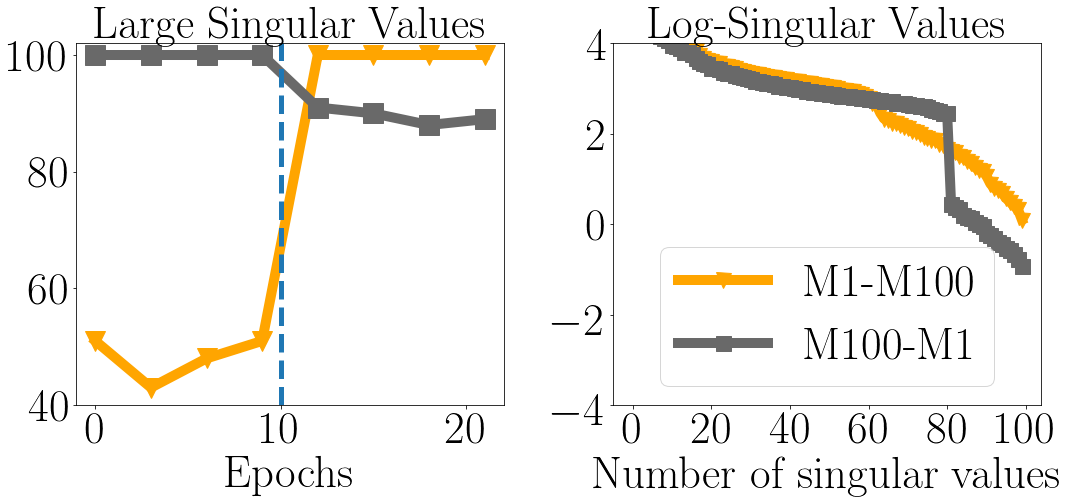

In [20]:
fig,axlist = plt.subplots(1,2,figsize=(16,8))  
ax = axlist.ravel()[1]
FS = 45
for name in markerFinal:
    if name not in results:
        print 'Skipping',name
        continue
    sval_last =  results[name]['svals'][-1][1:]
    svals  = np.sort(sval_last)
    if 'res' in name:
        continue
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    ax.plot(np.arange(len(svals)),np.log(svals[::-1]), marker=MARKER,label = name,color=COLOR,lw=10)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.8),ncol=2, frameon=False)
#ax.legend(loc='upper center', bbox_to_anchor=(.35, 1.4),ncol=3,columnspacing=0.1,fontsize=20)
ax.set_title('Log-Singular Values',fontsize=FS)
ax.set_xlabel('Number of singular values',fontsize=FS)
ax.set_xticks(np.arange(0,101,20))
ax.set_ylim(-4,4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5),ncol=1,columnspacing=0.1,fontsize=FS)

ax.tick_params(labelsize=FS)
#fname = 'logsingular-'+dataset+'.pdf'
#print fname,'saved'
#plt.savefig(fname,bbox_inches='tight')

ax = axlist.ravel()[0]
for idx,name in enumerate(markerFinal):
    if name not in results:
        print 'Skipping',name
        continue
    svals =  results[name]['svals']
    X     = svals[:,0]
    Y     = ((svals[:,1:]>1)*1.).sum(1)
    svals  = np.sort(sval_last)
    if 'res' in name:
        continue
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    ax.plot(X,Y,label = name, marker=MARKER, color=COLOR,lw=10,ms=20)

ax.axvline(x=10,linestyle='--')
ax.set_title('Large Singular Values',fontsize=FS)
ax.set_xlabel('Epochs',fontsize=FS)
ax.set_xticks(np.arange(0,int(MAXEPOCH)+1,10))
ax.set_ylim(40,102)
ax.set_yticks(np.arange(40,104,20))
ax.tick_params(labelsize=FS)
fname = 'singular-epochs-mixed-'+dataset+'.pdf'
print fname,'saved'
plt.tight_layout()
plt.savefig(fname,bbox_inches='tight')